In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = os.path.abspath('/content/spam.csv')
df = pd.read_csv(file_path,encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.drop_duplicates(keep='first')

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
new_names = {"v1" : "type" , "v2" : "message"}
df.rename(columns = new_names,inplace = True)

In [ ]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


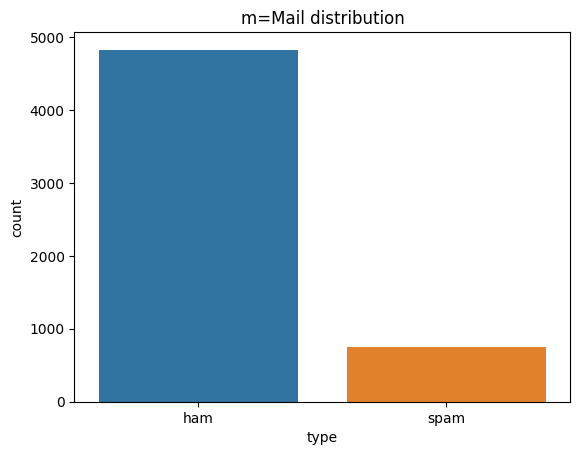

In [ ]:
sns.countplot(data = df, x = 'type')
plt.xlabel('type')
plt.ylabel('count')
plt.title('m=Mail distribution')
plt.show()

In [ ]:
type_mapping = {'spam': 1, 'ham': 0}
df['type'] = df['type'].map(type_mapping)
df.head()

,type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Characters'] = df['message'].apply(len)
df.head()

,type,message,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['word_count'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
df['sentence_count'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()


,type,message,Characters,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<ipython-input-23-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

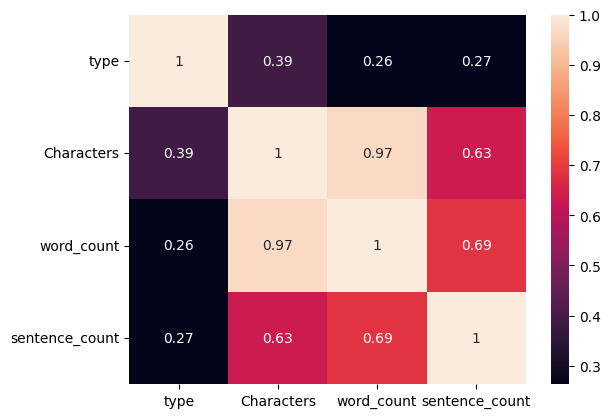

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def transform_message(message):
  message = message.lower()
  message = nltk.word_tokenize(message)

  ps = PorterStemmer()

  processed_words=[]

  for i in message:
    if i.isalnum():
      processed_words.append(i)

  for i in message:
    if i not in stopwords.words('english') and i not in string.punctuation:
      processed_words.append(i);
  message = processed_words[:]
  processed_words.clear()
  for i in message:
    processed_words.append(ps.stem(i))
  return " ".join(processed_words)


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [ ]:
df['transformed_message'] = df['message'].apply(transform_message)

In [ ]:
df.head()

,type,message,Characters,word_count,sentence_count,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [ ]:
spam_cloud = wc.generate(df[df['type']==1]['transformed_message'].str.cat(sep=" "))

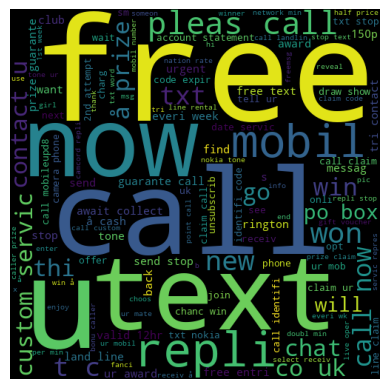

In [ ]:
plt.imshow(wc)
plt.axis("off")
plt.show()


In [ ]:
ham_cloud = wc.generate(df[df['type']==0]['transformed_message'].str.cat(sep=" "))

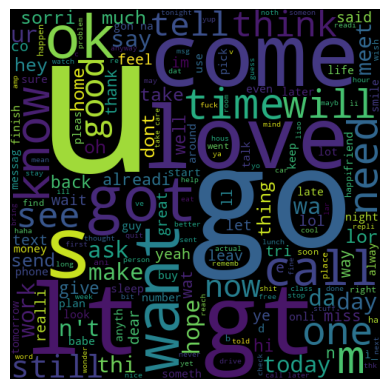

In [ ]:
plt.imshow(wc)
plt.axis("off")
plt.show()


In [ ]:
import seaborn as sns

Using feature selection and then training data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["transformed_message"]
Y = df["type"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
print(X_train)

1978    no i in the same boat still here at my mom che...
3989    bank of granit issu explos pick for our member...
3935    they r give a second chanc to rahul dengra r g...
4078    o i play smash bro lt gt religi play smash bro...
4086    privat your 2003 account statement for 0797378...
                              ...                        
3772    i came hostel i m go to sleep plz call me up b...
5191              sorri i call later sorri 'll call later
5226    prabha i soryda reali frm heart i sori prabha ...
5390          nt joke serious i told nt joke serious told
860            in work now go have in few min work go min
Name: transformed_message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 4053)	0.4394750069371241
  (0, 2910)	0.3290107208469823
  (0, 6582)	0.3290107208469823
  (0, 4284)	0.09440712580860279
  (0, 4348)	0.11263926667782925
  (0, 3820)	0.08408302711192042
  (0, 1610)	0.30557669079195043
  (0, 3956)	0.36014966430236056
  (0, 4039)	0.0881068105335491
  (0, 1057)	0.10004990364357043
  (0, 2996)	0.13319840105191819
  (0, 5547)	0.24947080406650038
  (0, 1323)	0.4394750069371241
  (0, 5059)	0.1580255156512205
  (0, 5819)	0.0735580178030421
  (0, 3182)	0.0802772685697582
  (0, 4156)	0.10437716682290553
  (1, 0)	0.13899511450256108
  (1, 1468)	0.10305202513515825
  (1, 5580)	0.14126725077016303
  (1, 4464)	0.21340533280792467
  (1, 3267)	0.057787233630874575
  (1, 5815)	0.06472244906551612
  (1, 1566)	0.3203765847516038
  (1, 5696)	0.3092773145262458
  :	:
  (4452, 1494)	0.1851631587036552
  (4452, 5919)	0.06181405659822652
  (4452, 6132)	0.11095271559073554
  (4452, 3820)	0.08733017009341196
  (4453, 5420)	0.6003219399291903
  (4453, 3519)	0.624038622462942


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_features,Y_train)

LinearSVC()

In [ ]:
predict_train_data=svm_classifier.predict(X_train_features)


In [ ]:
predict_test_data = svm_classifier.predict(X_test_features)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
, confusion_matrix, roc_curve, roc_auc_score,classification_report

('confusion_matrix,', 'roc_curve,', 'roc_auc_score,classification_report')

In [ ]:
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)
train_precision = precision_score(Y_train, predict_train_data)
print("Training Precision:", train_precision)



Accuracy on training data:  0.9995512676688355
Training Precision: 1.0


In [ ]:
accuracy_test_data = accuracy_score(Y_test,predict_test_data)
print("Accuracy on testing data: ",accuracy_test_data)
test_precision = precision_score(Y_test, predict_test_data)
print("Testing Precision:", test_precision)


Accuracy on testing data:  0.9847533632286996
Testing Precision: 0.9925925925925926


Using naive bytes

In [ ]:
from sklearn.naive_bayes import BernoulliNB


In [ ]:
naive_classifier = BernoulliNB()
naive_classifier.fit(X_train_features,Y_train)

BernoulliNB()

In [ ]:
predict_train = naive_classifier.predict(X_train_features)
predict_test = naive_classifier.predict(X_test_features)

In [ ]:
accuracy_train = accuracy_score(Y_train,predict_train)
print("Accuracy score of train data",accuracy_train)
train_precision = precision_score(Y_train, predict_train)
print("Training Precision:", train_precision)


Accuracy score of train data 0.9887816917208885
Training Precision: 0.9981785063752276


In [ ]:
accuracy_test = accuracy_score(Y_test,predict_test)
print("Accuracy score of test data",accuracy_test)
test_precision = precision_score(Y_test, predict_test)
print("Testing Precision:", test_precision)

Accuracy score of test data 0.9730941704035875
Testing Precision: 1.0


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
svm_classifier = LogisticRegression()
naive_classifier = BernoulliNB()

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('nb', naive_classifier)
], voting='soft')  # You can choose 'soft' or 'hard' voting

# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train_features, Y_train)

# Predict on the test data
predict_tests_data = voting_classifier.predict(X_test_features)




In [ ]:
accuracy_test_data = accuracy_score(Y_test, predict_test_data)
print("Accuracy on testing data: ", accuracy_test_data)

test_precision = precision_score(Y_test, predict_test_data)
print("Testing Precision:", test_precision)


Accuracy on testing data:  0.9847533632286996
Testing Precision: 0.9925925925925926


In [ ]:
import pickle
pickle.dump(svm_classifier, open('svm_classifier.pkl', 'wb'))
pickle.dump(naive_classifier, open('naive_classifier.pkl', 'wb'))